In [1]:
import os
import email
import random
import email.policy
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import sklearn
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from textblob import TextBlob


#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

import re

import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

import contractions
import warnings
warnings.filterwarnings("ignore")
from gensim.models import CoherenceModel

from pprint import pprint

from nltk.stem.porter import PorterStemmer


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

import pickle
import spacy

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, accuracy_score, average_precision_score, precision_recall_fscore_support)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Extra\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

In [2]:
# Define folder path

spam_emails = os.listdir("C:/Users/Extra/ML/ProjectCybersecurity/email/hamnspam/spam/")
ham_emails = os.listdir("C:/Users/Extra/ML/ProjectCybersecurity/email/hamnspam/ham/")


# Read the emails
def load_email(is_spam, filename):
    directory = "C:/Users/Extra/ML/ProjectCybersecurity/email/hamnspam/spam/" if is_spam else "C:/Users/Extra/ML/ProjectCybersecurity/email/hamnspam/ham/"
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
spam_emails = [load_email(True, filename) for filename in spam_emails]
ham_emails = [load_email(False, filename) for filename in ham_emails]

print("# of SPAM emails", len(spam_emails))
print("# of HAM emails", len(ham_emails))

# of SPAM emails 501
# of HAM emails 2551


In [3]:
def process_email(emails, label, data_dictionary, default_topic=None):
    for mail in emails:
        payload = mail.get_payload()
        if isinstance(payload, list):
            process_email(payload, label, data_dictionary, default_topic=mail["Subject"])
        else:
            if "Content-Type" in mail.keys():
                if "html" in mail["Content-Type"].lower():
                    try: 
                        soup = BeautifulSoup(mail.get_content())
                        
                        topic = mail["Subject"]
                        date = mail["Date"]
                        From = mail["From"]
                        To = mail["to"]
                        Attachments = mail["Attachments"]
                        Bcc = mail["Bcc"]
                        Cc = mail["cc"]




                        ###print("----- Date ----")
                        ###print(date)
                        ###print(From)
                        ###print(To)
                        ###print("----- cc ----")
                        ###print(Cc)


                        if topic == None:
                            topic = default_topic
                        content = soup.body.text
                        data_dictionary["Sender"].append(From)
                        data_dictionary["Receiver"].append(To)
                        data_dictionary["Date"].append(date)
                        data_dictionary["subject"].append(topic)
                        data_dictionary["content"].append(content)
                        data_dictionary["label"].append(label)
                    except:
                        pass
                elif "plain" in mail["Content-Type"].lower():
                    try: 
                        topic = mail["Subject"]
                        date = mail["Date"]
                        From = mail["From"]
                        To = mail["to"]
                        
                        if topic == None:
                            topic = default_topic
                        content = mail.get_content()
                        data_dictionary["Sender"].append(From)
                        data_dictionary["Receiver"].append(To)
                        data_dictionary["Date"].append(date)
                        data_dictionary["subject"].append(topic)
                        data_dictionary["content"].append(content)
                        data_dictionary["label"].append(label)
                    except:
                        pass
                else:
                    pass



In [4]:
# define disctionary stucture
emails_dictionary = {"Sender": [], "Receiver": [], "Date": [],"subject": [], "content": [], "label": []}
# Get Email Contents
process_email(spam_emails, "spam", emails_dictionary)
process_email(ham_emails, "ham", emails_dictionary)
# Convert Dictionaryt o DataFrame
emails_df = pd.DataFrame(emails_dictionary)
emails_df.tail()

Sender          Receiver  \
2661  newscientist <rssfeeds@example.com>  yyyy@example.com   
2662      guardian <rssfeeds@example.com>  yyyy@example.com   
2663  newscientist <rssfeeds@example.com>  yyyy@example.com   
2664      guardian <rssfeeds@example.com>  yyyy@example.com   
2665  newscientist <rssfeeds@example.com>  yyyy@example.com   

                                 Date  \
2661  Thu, 10 Oct 2002 08:04:25 -0000   
2662  Thu, 10 Oct 2002 08:04:10 -0000   
2663  Thu, 10 Oct 2002 08:04:26 -0000   
2664  Thu, 10 Oct 2002 08:04:10 -0000   
2665  Thu, 10 Oct 2002 08:04:26 -0000   

                                      subject  \
2661   Gene technique reveals human evolution   
2662         Go-ahead for new-style hospitals   
2663  Malicious code hidden in email software   
2664       'Flexible' retirement gains ground   
2665   Critical US satellites could be hacked   

                                                content label  
2661  URL: http://www.newsisfree.com/click/-3,871436...   ham  
2662  URL: http://www.newsisfree.com/click/-4,872399...   ham  
2663  URL: http://www.newsisfree.com/click/-3,871080...   ham  
2664  URL: http://www.newsisfree.com/click/-4,872400...   ham  
2665  URL: http://www.newsisfree.com/click/-3,870882...   ham

In [5]:
emails_df.drop(columns=['Sender','Receiver','Date'],inplace=True)

In [6]:
emails_df.head()

subject  \
0                     Life Insurance - Why Pay More?   
1  [ILUG] Guaranteed to lose 10-12 lbs in 30 days...   
2  Guaranteed to lose 10-12 lbs in 30 days       ...   
3  Re: Fw: User Name & Password to Membership To ...   
4  [ILUG-Social] re: Guaranteed to lose 10-12 lbs...   

                                             content label  
0  \n\n\n\n\n\n\n\n\n\n\nSave up to 70% on Life I...  spam  
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
3  ##############################################...  spam  
4  I thought you might like these:\n1) Slim Down ...  spam

In [7]:
data_5000 = pd.read_csv('spam_ham.csv', encoding='ISO-8859-1')

In [8]:
data_5000.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [9]:
data_5000.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
data_5000 = data_5000.rename(columns={"v1": "label"})
data_5000 = data_5000.rename(columns={"v2": "content"})

In [11]:
data_5000

label                                            content
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [12]:
data_email_parser = pd.concat([emails_df, data_5000])

In [13]:
data_email_parser.to_csv('emails_final_spam_ham.csv', index=False)

In [2]:
data_email_parser=pd.read_csv("emails_final_spam_ham.csv")


In [3]:
data_email_parser

subject  \
0                        Life Insurance - Why Pay More?   
1     [ILUG] Guaranteed to lose 10-12 lbs in 30 days...   
2     Guaranteed to lose 10-12 lbs in 30 days       ...   
3     Re: Fw: User Name & Password to Membership To ...   
4     [ILUG-Social] re: Guaranteed to lose 10-12 lbs...   
...                                                 ...   
8233                                                NaN   
8234                                                NaN   
8235                                                NaN   
8236                                                NaN   
8237                                                NaN   

                                                content label  
0     \n\n\n\n\n\n\n\n\n\n\nSave up to 70% on Life I...  spam  
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
3     ##############################################...  spam  
4     I thought you might like these:\n1) Slim Down ...  spam  
...                                                 ...   ...  
8233  This is the 2nd time we have tried 2 contact u...  spam  
8234              Will Ì_ b going to esplanade fr home?   ham  
8235  Pity, * was in mood for that. So...any other s...   ham  
8236  The guy did some bitching but I acted like i'd...   ham  
8237                         Rofl. Its true to its name   ham  

[8238 rows x 3 columns]

In [4]:
data_email_parser.shape

(8238, 3)

In [5]:
data_email_parser.columns

Index(['subject', 'content', 'label'], dtype='object')

In [6]:
data_email_parser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2656 non-null   object
 1   content  8238 non-null   object
 2   label    8238 non-null   object
dtypes: object(3)
memory usage: 193.2+ KB


In [7]:
data_email_parser.isnull().sum()

subject    5582
content       0
label         0
dtype: int64

In [8]:
data_email_parser['subject'] = data_email_parser['subject'].fillna(' ')

In [9]:
data_email_parser.duplicated().sum()

554

In [10]:
data_email_parser = data_email_parser.drop_duplicates()

In [11]:
data_email_parser.shape

(7684, 3)

In [12]:
data_email_parser

subject  \
0                        Life Insurance - Why Pay More?   
1     [ILUG] Guaranteed to lose 10-12 lbs in 30 days...   
2     Guaranteed to lose 10-12 lbs in 30 days       ...   
3     Re: Fw: User Name & Password to Membership To ...   
4     [ILUG-Social] re: Guaranteed to lose 10-12 lbs...   
...                                                 ...   
8233                                                      
8234                                                      
8235                                                      
8236                                                      
8237                                                      

                                                content label  
0     \n\n\n\n\n\n\n\n\n\n\nSave up to 70% on Life I...  spam  
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
3     ##############################################...  spam  
4     I thought you might like these:\n1) Slim Down ...  spam  
...                                                 ...   ...  
8233  This is the 2nd time we have tried 2 contact u...  spam  
8234              Will Ì_ b going to esplanade fr home?   ham  
8235  Pity, * was in mood for that. So...any other s...   ham  
8236  The guy did some bitching but I acted like i'd...   ham  
8237                         Rofl. Its true to its name   ham  

[7684 rows x 3 columns]

In [13]:
data_email_parser = data_email_parser.reset_index(drop=True)

In [14]:
data_email_parser

subject  \
0                        Life Insurance - Why Pay More?   
1     [ILUG] Guaranteed to lose 10-12 lbs in 30 days...   
2     Guaranteed to lose 10-12 lbs in 30 days       ...   
3     Re: Fw: User Name & Password to Membership To ...   
4     [ILUG-Social] re: Guaranteed to lose 10-12 lbs...   
...                                                 ...   
7679                                                      
7680                                                      
7681                                                      
7682                                                      
7683                                                      

                                                content label  
0     \n\n\n\n\n\n\n\n\n\n\nSave up to 70% on Life I...  spam  
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
3     ##############################################...  spam  
4     I thought you might like these:\n1) Slim Down ...  spam  
...                                                 ...   ...  
7679  This is the 2nd time we have tried 2 contact u...  spam  
7680              Will Ì_ b going to esplanade fr home?   ham  
7681  Pity, * was in mood for that. So...any other s...   ham  
7682  The guy did some bitching but I acted like i'd...   ham  
7683                         Rofl. Its true to its name   ham  

[7684 rows x 3 columns]

In [15]:
data_email_parser['label'].value_counts()

ham     6563
spam    1121
Name: label, dtype: int64

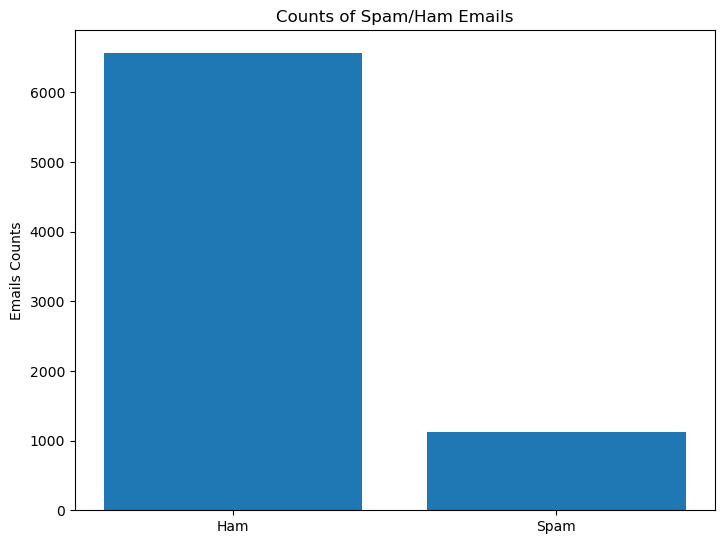

In [16]:
fig = plt.figure()
# plt.figure(figsize=(1,1))
ax = fig.add_axes([0,0,1,1])
labels = ['Ham', 'Spam']
ax.bar(labels,data_email_parser['label'].value_counts())
plt.ylabel('Emails Counts')
plt.title('Counts of Spam/Ham Emails')
plt.show()

# Pre-processing

In [17]:
data_email_parser

subject  \
0                        Life Insurance - Why Pay More?   
1     [ILUG] Guaranteed to lose 10-12 lbs in 30 days...   
2     Guaranteed to lose 10-12 lbs in 30 days       ...   
3     Re: Fw: User Name & Password to Membership To ...   
4     [ILUG-Social] re: Guaranteed to lose 10-12 lbs...   
...                                                 ...   
7679                                                      
7680                                                      
7681                                                      
7682                                                      
7683                                                      

                                                content label  
0     \n\n\n\n\n\n\n\n\n\n\nSave up to 70% on Life I...  spam  
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...  spam  
3     ##############################################...  spam  
4     I thought you might like these:\n1) Slim Down ...  spam  
...                                                 ...   ...  
7679  This is the 2nd time we have tried 2 contact u...  spam  
7680              Will Ì_ b going to esplanade fr home?   ham  
7681  Pity, * was in mood for that. So...any other s...   ham  
7682  The guy did some bitching but I acted like i'd...   ham  
7683                         Rofl. Its true to its name   ham  

[7684 rows x 3 columns]

#### LowerCase

In [18]:
data_email_parser["content"] = data_email_parser["content"].apply(lambda x: x.lower())

### Expand the Contractions

In [19]:
data_email_parser["content"] = data_email_parser["content"].apply(lambda x: contractions.fix(x))

#### Remove HTML tags

In [20]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [21]:
data_email_parser["content"]  = data_email_parser["content"] .apply(lambda x: remove_html(x))

#### Remove Non-ASCI:

In [22]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 

In [23]:
# remove non-ascii characters from the text
data_email_parser["content"]= data_email_parser["content"].apply(lambda x: remove_non_ascii(x))

### Remove special characters:

In [24]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
data_email_parser["content"]= data_email_parser["content"].apply(lambda x: remove_special_characters(x))

### Replace the Typos, slang, acronyms or informal abbreviations


In [26]:
def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [27]:
# remove punctuations from the text
data_email_parser["content"] = data_email_parser["content"].apply(lambda x: other_clean(x))

### Remove \n


In [28]:
data_email_parser["content"]  = data_email_parser["content"].apply(lambda x: re.sub('\n','', x))

#### Remove Non-English characters

In [29]:
data_email_parser["content"]= data_email_parser["content"].apply(lambda x: re.sub(r'[^\x00-\x7f]',r'', x))

In [30]:
data_email_parser["content"][7000]

'private! your 2004 account statement for 078498****7 shows 786 unredeemed bonus points. to claim call 08719180219 identifier code: 45239 expires 06.05.05'

# World Cloud

In [31]:
from wordcloud import WordCloud
def create_word_cloud(target_df, column_name):
  print('Joining all words into long text....')
  full_text = ','.join(list(target_df[column_name].values))
  wordcloud = WordCloud(background_color="black", 
                        max_words=100,  # top 100 words in the
                        contour_width=2, 
                        contour_color='yellow')
  print('Creating word cloud')
  wordcloud.generate(full_text)
  return wordcloud

Joining all words into long text....
Creating word cloud


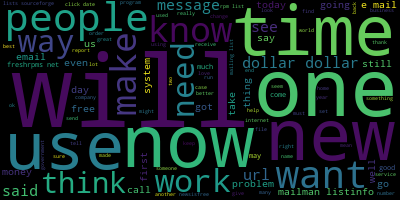

In [32]:
wordcloud = create_word_cloud(data_email_parser, 'content')
wordcloud.to_image()

# Data Modeling and Tokenization

In [33]:
stop_words.extend(['has', 'been', 're', 'com', 'edu', 'use'])

In [34]:
# If you set deacc=True which will removes the punctuations (that we already removed)
def convert_sentences_to_words(sentences):
    for sentence in sentences:        
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [35]:
text_to_list = data_email_parser.content.values.tolist()

In [36]:
text_to_list[0]

"save up to 70% on life insurance.why spend more than you have to?life quote savingsensuring your       family's financial security is very important. life quote savings makes       buying life insurance simple and affordable. we provide free access to the       very best companies and the lowest rates.life quote savings is fast, easy and             saves you money! let us help you get started with the best values in             the country on new coverage. you can save hundreds or even thousands             of dollars by requesting a free quote from lifequote savings. our             service will take you less than 5 minutes to complete. shop and             compare. save up to 70% on all types of life insurance! click here for your             free quote!protecting your family is the best investment you will ever           make!if you are in receipt of this email       in error and/or wish to be removed from our list, please click here and type remove. if you       reside in any sta

In [37]:
len(text_to_list)

7684

In [38]:
text_as_words = list(convert_sentences_to_words(text_to_list))

In [39]:
print(text_as_words[0])

['save', 'up', 'to', 'on', 'life', 'insurance', 'why', 'spend', 'more', 'than', 'you', 'have', 'to', 'life', 'quote', 'savingsensuring', 'your', 'family', 'financial', 'security', 'is', 'very', 'important', 'life', 'quote', 'savings', 'makes', 'buying', 'life', 'insurance', 'simple', 'and', 'affordable', 'we', 'provide', 'free', 'access', 'to', 'the', 'very', 'best', 'companies', 'and', 'the', 'lowest', 'rates', 'life', 'quote', 'savings', 'is', 'fast', 'easy', 'and', 'saves', 'you', 'money', 'let', 'us', 'help', 'you', 'get', 'started', 'with', 'the', 'best', 'values', 'in', 'the', 'country', 'on', 'new', 'coverage', 'you', 'can', 'save', 'hundreds', 'or', 'even', 'thousands', 'of', 'dollars', 'by', 'requesting', 'free', 'quote', 'from', 'lifequote', 'savings', 'our', 'service', 'will', 'take', 'you', 'less', 'than', 'minutes', 'to', 'complete', 'shop', 'and', 'compare', 'save', 'up', 'to', 'on', 'all', 'types', 'of', 'life', 'insurance', 'click', 'here', 'for', 'your', 'free', 'quote

## Remove stop words


In [40]:
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [41]:
clean_words = remove_all_stop_words(text_as_words)

In [42]:
print(clean_words[0])

['save', 'life', 'insurance', 'spend', 'life', 'quote', 'savingsensuring', 'family', 'financial', 'security', 'important', 'life', 'quote', 'savings', 'makes', 'buying', 'life', 'insurance', 'simple', 'affordable', 'provide', 'free', 'access', 'best', 'companies', 'lowest', 'rates', 'life', 'quote', 'savings', 'fast', 'easy', 'saves', 'money', 'let', 'us', 'help', 'get', 'started', 'best', 'values', 'country', 'new', 'coverage', 'save', 'hundreds', 'even', 'thousands', 'dollars', 'requesting', 'free', 'quote', 'lifequote', 'savings', 'service', 'take', 'less', 'minutes', 'complete', 'shop', 'compare', 'save', 'types', 'life', 'insurance', 'click', 'free', 'quote', 'protecting', 'family', 'best', 'investment', 'ever', 'make', 'receipt', 'email', 'error', 'wish', 'removed', 'list', 'please', 'click', 'type', 'remove', 'reside', 'state', 'prohibits', 'mail', 'solicitations', 'insurance', 'please', 'disregard', 'email']


## Bigram / Lemmatization


In [43]:
bigram = gensim.models.Phrases(clean_words, min_count=5, threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [44]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


In [45]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [46]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [47]:
clean_words_bigrams = make_bigrams(clean_words)

In [48]:
clean_words_bigrams[0]

['save',
 'life_insurance',
 'spend',
 'life',
 'quote',
 'savingsensuring',
 'family',
 'financial',
 'security',
 'important',
 'life',
 'quote',
 'savings',
 'makes',
 'buying',
 'life_insurance',
 'simple',
 'affordable',
 'provide',
 'free',
 'access',
 'best',
 'companies',
 'lowest',
 'rates',
 'life',
 'quote',
 'savings',
 'fast',
 'easy',
 'saves',
 'money',
 'let',
 'us',
 'help',
 'get',
 'started',
 'best',
 'values',
 'country',
 'new',
 'coverage',
 'save',
 'hundreds',
 'even',
 'thousands_dollars',
 'requesting',
 'free',
 'quote',
 'lifequote',
 'savings',
 'service',
 'take',
 'less',
 'minutes',
 'complete',
 'shop',
 'compare',
 'save',
 'types',
 'life_insurance',
 'click',
 'free',
 'quote',
 'protecting',
 'family',
 'best',
 'investment',
 'ever',
 'make',
 'receipt',
 'email',
 'error',
 'wish',
 'removed',
 'list',
 'please',
 'click',
 'type',
 'remove',
 'reside',
 'state',
 'prohibits',
 'mail',
 'solicitations',
 'insurance',
 'please',
 'disregard',
 'em

In [49]:
clean_words_lemmatized = lemmatization(clean_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [50]:
clean_words_lemmatized[7000]

['private_account',
 'unredeemed',
 'bonus',
 'point',
 'claim',
 'call_identifi',
 'code_expire']

## POS Tagging

In [51]:
def pos_tagging_nltk(tokens):
    return [nltk.pos_tag(w) for w in tokens if w]

In [52]:
pos_tagging_nltk(clean_words_lemmatized)

[[('spend', 'JJ'),
  ('life', 'NN'),
  ('savingsensure', 'NN'),
  ('family', 'NN'),
  ('financial', 'JJ'),
  ('security', 'NN'),
  ('important', 'JJ'),
  ('life', 'NN'),
  ('saving', 'VBG'),
  ('make', 'VBP'),
  ('buy', 'JJ'),
  ('simple', 'JJ'),
  ('affordable', 'JJ'),
  ('provide', 'NN'),
  ('free', 'JJ'),
  ('access', 'NN'),
  ('good', 'JJ'),
  ('company', 'NN'),
  ('lowest', 'JJS'),
  ('rate', 'NN'),
  ('life', 'NN'),
  ('saving', 'VBG'),
  ('fast', 'JJ'),
  ('easy', 'JJ'),
  ('save', 'VB'),
  ('money', 'NN'),
  ('let', 'NN'),
  ('help', 'VB'),
  ('get', 'VB'),
  ('start', 'VB'),
  ('good', 'JJ'),
  ('value', 'NN'),
  ('country', 'NN'),
  ('new', 'JJ'),
  ('coverage', 'NN'),
  ('save', 'VBP'),
  ('hundred', 'VBN'),
  ('even', 'RB'),
  ('thousands_dollar', 'JJ'),
  ('request', 'NN'),
  ('free', 'JJ'),
  ('lifequote', 'NN'),
  ('saving', 'VBG'),
  ('service', 'NN'),
  ('take', 'VB'),
  ('less', 'JJR'),
  ('minute', 'JJ'),
  ('complete', 'JJ'),
  ('shop', 'NN'),
  ('compare', 'NN'),
 

## Named Entity

In [54]:
# Load the small English model in spaCy
nlp = spacy.load('en_core_web_sm')

# Iterate over each sub-list of words
for words in clean_words_lemmatized:
    # Join the words back into a single string
    text = " ".join(words)
    
    # Process the text with the NLP pipeline
    doc = nlp(text)
    
    # Iterate over each named entity in the document and print its label and text
    for ent in doc.ents:
        print(ent.label_, ent.text)

CARDINAL hundred
DATE last month
CARDINAL aid_girls
CARDINAL thousand
NORP asian
DATE last year
TIME hour
DATE last month
DATE year year year year year year year
DATE today
PERSON comto_unsubscribe click
ORG ad_jm
PERSON booster antennas
ORDINAL first
PERSON comto_unsubscribe click
ORG ad_jm
ORDINAL second
DATE monthly
DATE month
ORG sonsgeorge ivoire
CARDINAL billion
NORP european
ORG callingmeor send fax immediately enclose full address
DATE last payment quarter
DATE last working day
ORG sonsgeorge ivoire
CARDINAL billion
NORP european
DATE today
TIME less minute
ORG toshiba
DATE next day
DATE first day
DATE week
DATE week
CARDINAL half
DATE businesstoday
CARDINAL million
CARDINAL half
DATE weekly
DATE total week
ORDINAL first
DATE thenext month
DATE far past month
DATE day
CARDINAL half
CARDINAL hundred
DATE within_week
DATE week
DATE week month
CARDINAL one
DATE within_week
DATE next day
DATE several week
PERSON foundmy
DATE first week
DATE carefully day
ORDINAL first
DATE third mo

NORP contrat
ORG san connaissance informatique premire brique
ORG marque blanche acteur
FAC dveloppement_de investisseur
ORG des_investisseur
ORG conducteur sont chaque
ORG comparaison rvolutionnaire
ORG dinvestisseur
PERSON optimal dan thierry info
PERSON mot elle gnreuse
PERSON mtre carr
PERSON addr freebsd
NORP contrat
ORG san connaissance informatique premire brique
ORG marque blanche acteur
FAC dveloppement_de investisseur
ORG des_investisseur
ORG conducteur sont chaque
ORG comparaison rvolutionnaire
ORG dinvestisseur
PERSON optimal dan thierry info
PERSON mot elle gnreuse
PERSON mtre carr
PERSON addr freebsd question freebsd
DATE annual
DATE month
PERSON mnner jeden
TIME hour
DATE year
CARDINAL million
DATE today
DATE today
DATE daily
TIME hour
EVENT watching_tv
TIME day night
DATE today
TIME hour
DATE year
CARDINAL million
DATE today
DATE today
DATE daily
ORG org
TIME hour
EVENT watching_tv
TIME day night
DATE today
ORG org
DATE month
PERSON best_regard sarah
PERSON sarah_willia

TIME midday
TIME midday
DATE today
DATE tomorrow
DATE today
ORG wi
PERSON independent_rd
DATE month
ORDINAL first
DATE anywhere month
DATE hour week
DATE month tend month
ORDINAL first
DATE hour day day week
PERSON comto_unsubscribe click
ORG ad_jm
DATE last month
DATE today
DATE last year
PERSON youradult
PERSON independent_rd
PERSON remove php
CARDINAL hundred
CARDINAL thousand
ORG urgent confidential business proposition foreign oil consultant foreign contractor
NORP nigerian
DATE month
DATE month
ORG nigerian national corporation die automobile accident
NORP nigerian
TIME midday
DATE sign month
DATE month end
TIME today minute
CARDINAL thousand
TIME next hour
PERSON comto_unsubscribe click
ORG ad_jm
DATE year
DATE year
DATE year
DATE year
MONEY half dollar
ORG american citizenor resident entitle
NORP hispanic
NORP jewish
NORP catholic
DATE thenext month
DATE today
ORG keepa
ORDINAL first
PERSON theroof complete
DATE past year
ORG business duringmy career
CARDINAL dozen
DATE year
DA

QUANTITY centimetre inch
DATE hundred year old
PERSON metre earth
CARDINAL hundred
NORP buddhist
NORP european
NORP british
PERSON millimetre inch tall
NORP french
NORP european
NORP dutch
NORP british
NORP french
NORP italian
NORP swedish
NORP british
NORP british
NORP japanese american
PERSON mm
NORP british
ORDINAL second
NORP british
NORP french
NORP dutch
NORP dutch
NORP british
NORP german
NORP german
NORP british
NORP american
ORG per_cent briton accord daily
NORP russian
DATE daily
DATE yesterday
GPE russia
GPE russian city
NORP russian
NORP british
TIME hour
NORP soviet
ORG shabby house
GPE kopeck
GPE kopeck
NORP british
NORP russian
NORP english
NORP belorussian
NORP russian
NORP russian
DATE winter
DATE month summer
NORP russian
NORP russian
ORG siena
ORDINAL first
DATE yesterday
NORP sardinian
DATE early month
LOC moment mount
PERSON beat kick minute
DATE yesterday
ORDINAL first
ORDINAL first
DATE twice year
DATE week
DATE day
TIME last minute
DATE first year
ORDINAL second

MONEY ten billion dollar
NORP french
NORP french
NORP french
NORP french
NORP manycan
NORP french
ORDINAL first
NORP european
DATE week
ORG req
ORG int celeron bench int polygon
ORG gecko
ORDINAL first
NORP republican
TIME next minute
DATE year
NORP republican
ORG call new_york quote dirksen
CARDINAL half
DATE last year
PERSON justin_mason
ORDINAL first
NORP canadian
TIME noon
PERSON librarie weighin
PERSON issitte
ORDINAL runningmonth
PERSON java
CARDINAL half
ORG gecko
ORDINAL first
DATE age month
CARDINAL half
PERSON librarie pick
PERSON muddy bestchoice
ORDINAL second
ORDINAL first
PERSON java
ORDINAL second
ORDINAL second
DATE programmer week
CARDINAL one
ORDINAL first
ORDINAL first
DATE year
DATE age month
TIME day tatum hour
PERSON javaclass librarie
ORG java collection
DATE holiday year
DATE half year
PERSON order liter liquid
ORDINAL second
PERSON freebsd
DATE year
PERSON mrsrobinson
CARDINAL xent_behalf
PERSON boogiepop
DATE writertuesday
ORDINAL first
DATE class week
PERSON 

ORDINAL first
ORDINAL second
PERSON mailto swilliam lig
NORP muslim
NORP muslim
NORP muslim
TIME hour
DATE therackspace month
PERSON swilliam weaken
NORP muslim
DATE year
ORG catholic feud
NORP british
NORP british
ORG cover hill
NORP catholic
NORP muslim
ORG catholic feud
NORP british
NORP muslim
ORG cover hill
NORP irish
NORP irish
DATE wouldbe
NORP muslim
PERSON youngpatriot armed
DATE summer
DATE week
DATE year
ORG rsa implementation typo
NORP magi
NORP magi
PERSON centricpeer peer computing
ORG rsa secure partner program program
ORG rsa securid factor
ORG rsa certificate management strategic partnership
DATE today
ORDINAL first
DATE almost year
PERSON legit
NORP vietnamese
ORDINAL first
NORP catholic
NORP anglican
NORP catholic
NORP muslim
NORP canadian
GPE wasa
NORP tibetan
ORG pravda
NORP smugglethese
NORP scan
DATE recent year
DATE writertuesday
PERSON justin_mason
NORP tibetan
PERSON wolf attack
DATE recent year
NORP tibetan
DATE year
ORG anomaly youhave
PERSON luis villa
NORP

DATE several year
DATE summer
DATE last month
DATE century ago
DATE melt decade
DATE century
PERSON frozen mummy
PERSON legendary iceman
ORDINAL first
ORDINAL first
DATE week later
DATE year
DATE summer
DATE century
ORDINAL first
CARDINAL one
DATE last week
NORP chinese
ORDINAL second
NORP chinese
DATE early month
NORP chinese
NORP chinese
NORP chinese
NORP chinese
DATE last week
NORP chinese
DATE early week
NORP buddhist
TIME several minute
DATE next year
ORG bear poundof bean
ORG seattle compare new_york seattlealso
FAC seattle sb
DATE early year
DATE half day
DATE espresso lover day
DATE year
PERSON beexpecte espresso
ORG shell
TIME morning
DATE annually
DATE next year
DATE day
CARDINAL xent_behalf
ORG crook best_regard
NORP republican
TIME evening
TIME night
TIME evening
MONEY several hundred_thousand dollar
ORDINAL third
ORG lush hill
ORG fig
PERSON gratin sommeli stphane lacroix
TIME evening
PERSON damn federalist bumsrush
GPE oregon
DATE year
DATE weekly
TIME evening
PERSON slip

PERSON suppose berethinke fcc role
NORP magi
TIME night
CARDINAL one
NORP venetian
CARDINAL one
ORDINAL first
ORG lemann speculation
PERSON lemann
DATE last year
ORDINAL first
NORP american
NORP american
DATE decade
DATE year year
PERSON per_cent american
DATE daily
DATE year
DATE market month
PERSON kum
DATE last spring
NORP american
DATE unfairly decade
DATE daily
CARDINAL eighty
NORP american
DATE mid ninety dozen
CARDINAL million
DATE year
ORDINAL first
DATE first century
NORP republican
DATE year
DATE year
ORDINAL first
DATE first day month
CARDINAL half
DATE today
DATE spring
ORG michael_powell
PERSON powell
DATE today
ORG appoint new_york
DATE summer
ORDINAL first
CARDINAL one
TIME morning
DATE year
ORG mci
DATE year
DATE year
DATE example month
ORDINAL second
ORDINAL first
PERSON begin_forwarde
DATE today
DATE weekend
DATE year
DATE today
NORP american
ORDINAL first
ORDINAL second
DATE fifth day
DATE week
DATE year
DATE next week
ORDINAL first
DATE weekend
DATE weekend
CARDINAL

DATE day
ORDINAL first
DATE year
DATE today
PERSON pobox comconsulte
PERSON mark base
TIME hour
TIME hour
NORP english
NORP japanese
DATE today
DATE today
DATE today
DATE tomorrow
ORG dns
DATE know week
TIME tonight
PERSON voidstar_curriculum vitae
NORP ifthese
CARDINAL one
PERSON voidstar_curriculum vitae
PERSON sendmail bort
PERSON voidstar_curriculum vitae
PERSON dev null
ORDINAL first
ORG joshthank
DATE monthly
CARDINAL million
CARDINAL million
ORG yannick_gingra
ORDINAL first
ORG perl_site_perl
ORG perl_site_perl
ORG dns
ORG dns
ORDINAL first
CARDINAL one
ORDINAL first
CARDINAL one
CARDINAL one
GPE sysadmin
DATE week start tomorrow
DATE next week
ORDINAL third
PERSON freebsd
PERSON spamassassin dev
ORG log mail log
PERSON updatequentin krengelkrengel
ORG html wrap
PERSON ian ian
PERSON jm justin_mason
DATE month old
ORDINAL third
DATE month spamtrap
ORDINAL first
ORDINAL second
ORDINAL second
DATE almost half day
DATE almost half day
DATE spamtrap
PERSON tony knowledge_toward kuns

DATE year
ORDINAL first
ORDINAL third
DATE present day
NORP spanish
DATE yesterday
DATE today
TIME hour
ORG google
ORG info group
ORG google group
ORG google group
ORG google
ORG google decwrl group
ORG google group
ORG google pcd
DATE yesterday
TIME afternoon
PERSON php story
DATE month ago
ORG abet
ORG pttrans_dot
PRODUCT gif
PERSON box gif submit
PERSON bobby bobbyservlet
PERSON bobby
DATE last year
DATE last year
DATE last month year
CARDINAL gatfishe
DATE late yesterday
DATE year ago
ORDINAL second
PERSON network sniffer
PERSON www_newsisfree
DATE month
NORP french
DATE supplieda year
NORP french
ORG boe
ORG wsj publish
DATE carry year
DATE recent month
TIME minute
CARDINAL million
PERSON timmyerrorsmall jpg
DATE month old
ORG chase
DATE much past year
PERSON jivaro head
ORG boe
ORDINAL first
FAC dash anil
PERSON boe nhwz
PERSON boe vrmgphlfgxpz
PERSON hoaxer jon ronson
PERSON jpg wonderful
ORG jar lilek new_york
DATE year
DATE today
DATE free day
ORG duke
DATE today
DATE today da

PERSON complete degree join
TIME afternoon
DATE tomorrow
PERSON brand_new nokia
DATE today
TIME afternoon
DATE today
DATE tomorrow
ORG chase
CARDINAL half
PERSON bill miller
DATE tomorrow
DATE bad day
TIME morning
TIME tonight
TIME mom morning
ORDINAL second
TIME tonight
NORP british
DATE next week
DATE day
DATE yesterday
ORG nokia
TIME evening
NORP french
GPE feelin
PERSON switch fone
TIME evening
PERSON juz wat
TIME daytime
DATE next week
ORDINAL fourth
DATE monthly
TIME tonight
DATE tomorrow
DATE today
DATE weekly
DATE week
PERSON eatin fren
ORDINAL first
PERSON mummy
DATE today
PERSON loverboy
ORG wc_xx
PERSON frnd
TIME minute
TIME tonight
DATE next week
ORG chikku simple habba
DATE tomorrow
CARDINAL one
ORDINAL second
ORG nokia
ORG nokia
TIME tonight
TIME afternoon
ORDINAL first
PERSON chikku
ORDINAL first
DATE week
DATE year
DATE today
DATE nice day
DATE today
DATE exam week
DATE tomorrow
TIME tonight
TIME late night
DATE year
ORDINAL first
DATE tomorrow
DATE today
PERSON elliot 

DATE new year
CARDINAL one
LOC earth
TIME night
TIME tonight
DATE time week
TIME night
TIME tonight
DATE yesterday
DATE today
TIME later tonight
DATE daily
DATE today
TIME tonight
ORG sec
TIME couple hour
DATE today
DATE tomorrow
DATE tomorrow
DATE weekend
PERSON mph ho
PERSON money steve
DATE daily
TIME afternoon
PERSON max
PERSON congratulations_awarde voucher gift
DATE next month
DATE day chapter month
DATE new year
PERSON gary split
TIME tonight
DATE weekend
TIME hour
TIME hour
DATE today
PERSON wat time
DATE today
PERSON sunshine win
DATE today
CARDINAL half
DATE tomorrow
ORDINAL second
DATE tomorrow
ORG ref
TIME hour
TIME tonight
DATE tomorrow
TIME later tonight
ORDINAL first
NORP chikku
DATE yesterday
TIME next second
CARDINAL thousand
ORDINAL second
DATE weekly
DATE week
PERSON eyed info
TIME night
DATE weekend
DATE week
PERSON lonline lotz
TIME tonight
DATE today
DATE yesterday
ORG santa
PERSON cool tyler
TIME later tonight
ORDINAL first
ORDINAL second
ORG new mobile
DATE toda

## Tokenizing

In [55]:
id2word = corpora.Dictionary(clean_words_lemmatized)

In [56]:
texts = clean_words_lemmatized

In [57]:
corpus = [id2word.doc2bow(text) for text in texts]

In [58]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 3), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 2), (46, 3), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1)], [(18, 1), (19, 1), (30, 1), (54, 1), (61, 5), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 3)], [(18, 1), (19, 1), (30, 1), (54, 1), (61, 5), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (73, 1), (74, 1), (75, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 

## Topic Model

In [59]:
num_topics = 10

In [60]:
# Using Gensin to build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=num_topics,
                                       )

In [61]:
# Print the Keyword in the N (=num_topics) topics
pprint(lda_model.print_topics())
#pprint(lda_model.print_topics(N))

[(0,
  '0.012*"list" + 0.007*"get" + 0.006*"write" + 0.006*"go" + 0.006*"say" + '
  '0.006*"net" + 0.005*"make" + 0.005*"rpm" + 0.005*"think" + 0.005*"work"'),
 (1,
  '0.010*"get" + 0.005*"good" + 0.005*"need" + 0.005*"mail" + 0.005*"say" + '
  '0.005*"see" + 0.005*"day" + 0.005*"free" + 0.005*"time" + 0.005*"call"'),
 (2,
  '0.008*"make" + 0.006*"get" + 0.006*"time" + 0.006*"want" + 0.005*"people" + '
  '0.005*"free" + 0.004*"know" + 0.004*"go" + 0.004*"http" + 0.004*"work"'),
 (3,
  '0.013*"get" + 0.012*"list" + 0.007*"time" + 0.006*"go" + 0.006*"net" + '
  '0.005*"people" + 0.005*"make" + 0.005*"know" + 0.005*"write" + '
  '0.005*"work"'),
 (4,
  '0.007*"say" + 0.006*"go" + 0.006*"see" + 0.005*"list" + 0.005*"find" + '
  '0.005*"get" + 0.005*"time" + 0.005*"www" + 0.005*"mail" + 0.004*"send"'),
 (5,
  '0.007*"go" + 0.007*"get" + 0.006*"free" + 0.006*"know" + 0.005*"call" + '
  '0.005*"say" + 0.005*"think" + 0.005*"send" + 0.005*"want" + 0.004*"new"'),
 (6,
  '0.008*"mail" + 0.007*"g

In [63]:
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=False):
    print("Topic {}: {}".format(i, " ".join([word for word, _ in topic])))

Topic 0: list get write go say net make rpm think work
Topic 1: get good need mail say see day free time call
Topic 2: make get time want people free know go http work
Topic 3: get list time go net people make know write work
Topic 4: say go see list find get time www mail send
Topic 5: go get free know call say think send want new
Topic 6: mail get go list send make work call need people
Topic 7: get list say write go make new people work still
Topic 8: say get good time make free day also go see
Topic 9: get go way make free new people need time good


In [64]:
doc_lda = lda_model[corpus]

In [54]:
doc_lda

## Analyzing the LDA Model

In [55]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [56]:
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

In [57]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [58]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [59]:
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

In [60]:
LDAvis_prepared 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.007214 -0.006235       1        1  24.216371
6      0.012981  0.006894       2        1  15.199685
9      0.031057 -0.003236       3        1  11.334614
3     -0.010450  0.034207       4        1   9.120922
0      0.021248  0.015559       5        1   8.467664
5     -0.010631  0.009831       6        1   7.704725
2     -0.003716 -0.022865       7        1   6.652094
4     -0.035770  0.001651       8        1   6.555285
1      0.000061 -0.022234       9        1   6.236320
7     -0.011994 -0.013572      10        1   4.512320, topic_info=      Term         Freq        Total Category  logprob  loglift
197     go  1418.000000  1418.000000  Default  30.0000  30.0000
30    list  1616.000000  1616.000000  Default  29.0000  29.0000
19     get  2380.000000  2380.000000  Default  28.0000  28.0000
492   come   672.000000   672.000000  Default  27.0000  27.0000
271   call   831.000000   831.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
247    use    28.343326   745.868896  Topic10  -6.0344  -0.1718
429   know    29.545586   895.900588  Topic10  -5.9928  -0.3135
476  write    30.206765  1042.078975  Topic10  -5.9707  -0.4425
185  think    28.490245   838.380982  Topic10  -6.0292  -0.2836
382   also    27.041707   705.155775  Topic10  -6.0814  -0.1627

[866 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
0          1  0.399295        access
0          2  0.140928        access
0          3  0.056371        access
0          4  0.093952        access
0          5  0.070464        access
...      ...       ...           ...
21948      2  0.231944       zawodny
21948      6  0.695833       zawodny
87         1  0.719469  zzzz_example
87         2  0.102781  zzzz_example
87         3  0.102781  zzzz_example

[2390 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 10, 4, 1, 6, 3, 5, 2, 8])

In [ ]:
# coherence score
coherence_model_lda=CoherenceModel(model=lda_model,texts=clean_words_lemmatized,dictionary=id2word,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Score:',coherence_lda)

# Modeling

In [65]:
ps = PorterStemmer()

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [67]:
data_email_parser["content"]

0       save up to 70% on life insurance.why spend mor...
1       1) fight the risk of cancer!http://www.adclick...
2       1) fight the risk of cancer!http://www.adclick...
3       ##############################################...
4       i thought you might like these:1) slim down - ...
                              ...                        
7679    this is the 2nd time we have tried 2 contact y...
7680                 will _ b going to esplanade fr home?
7681    pity, * was in mood for that. so...any other s...
7682    the guy did some bitching but i acted like i w...
7683    rolling on the floor laughing. its true to its...
Name: content, Length: 7684, dtype: object

In [68]:
data_email_parser["content"] = data_email_parser["content"].apply(transform_text)

In [42]:
#data_Modeling = pd.DataFrame({'text': clean_words_lemmatized})

In [43]:
#data_Modeling['text'] = data_Modeling['text'].apply(lambda x: ' '.join(x))

In [44]:
#data_email_parser["content"]=data_Modeling['text']

In [69]:
data_email_parser["content"]

0       save 70 life spend life quot savingsensur fami...
1       1 fight risk cancer http slim guarante lose po...
2       1 fight risk cancer http slim guarante lose po...
3       adult club offer free membership instant acces...
4       thought might like slim guarante lose pound 30...
                              ...                        
7679    2nd time tri 2 contact 750 pound prize 2 claim...
7680                                b go esplanad fr home
7681                                    piti mood suggest
7682    guy bitch act like would interest buy someth e...
7683                           roll floor laugh true name
Name: content, Length: 7684, dtype: object

In [70]:
data_email_parser.columns

Index(['subject', 'content', 'label'], dtype='object')

In [71]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [72]:
X = tfidf.fit_transform(data_email_parser["content"]).toarray()

In [73]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.22399792],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
data_email_parser['label'] = encoder.fit_transform(data_email_parser['label'])

In [75]:
y = data_email_parser['label'].values

In [76]:
y

array([1, 1, 1, ..., 0, 0, 0])

## Training and Testing

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6147, 3000) (6147,)
Test set: (1537, 3000) (1537,)


## Model Classifier

In [78]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [80]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #report=classification_report(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    #return report
    return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9713728041639558
Precision -  0.9523809523809523
For  KN
Accuracy -  0.9128171763175016
Precision -  0.9655172413793104
For  NB
Accuracy -  0.9674690956408588
Precision -  0.9824561403508771
For  DT
Accuracy -  0.9056603773584906
Precision -  0.6732673267326733
For  LR
Accuracy -  0.9616135328562134
Precision -  0.9382022471910112
For  RF
Accuracy -  0.9746258945998699
Precision -  0.9731182795698925
For  AdaBoost
Accuracy -  0.9453480806766428
Precision -  0.8258706467661692
For  BgC
Accuracy -  0.9531554977228367
Precision -  0.8294930875576036
For  ETC
Accuracy -  0.9772283669486012
Precision -  0.9736842105263158
For  GBDT
Accuracy -  0.9505530253741054
Precision -  0.9727891156462585
For  xgb
Accuracy -  0.9655172413793104
Precision -  0.9354838709677419


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [104]:
performance_df

Algorithm  Accuracy  Precision
8        ETC  0.977228   0.973684
5         RF  0.974626   0.973118
0        SVC  0.971373   0.952381
2         NB  0.967469   0.982456
10       xgb  0.965517   0.935484
4         LR  0.961614   0.938202
7        BgC  0.953155   0.829493
9       GBDT  0.950553   0.972789
6   AdaBoost  0.945348   0.825871
1         KN  0.912817   0.965517
3         DT  0.905660   0.673267

## VotingClassifier

In [105]:
voting = VotingClassifier(estimators=[('RF', rfc), ('ETC', etc), ('Xgb', xgb), ('Svc', svc), ('LR', lrc)],voting='soft')

In [106]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('Xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            learning_rate=0.300000012,

In [110]:
#y_pred = voting.predict(X_test)
#print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

# SVC

In [112]:
svc.fit(X_train, y_train)

# prediction
preds = svc.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns

print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1322
           1       0.95      0.84      0.89       215

    accuracy                           0.97      1537
   macro avg       0.96      0.92      0.94      1537
weighted avg       0.97      0.97      0.97      1537

----------------- Overall Results -----------------
Accuracy Result: 97.14%
Precision Result: 96.32%
Recall Result: 91.52%
F1-Score Result: 93.73%


### Confusion matrix visualization

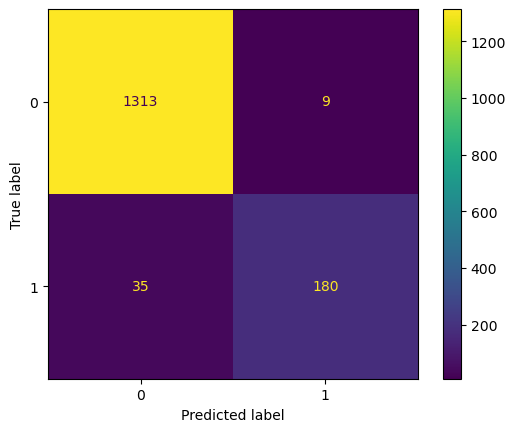

In [114]:
#  Confusion Matrix
cm1 = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=svc.classes_)
disp.plot()
plt.show()

# Logistic Regression

In [116]:
lrc.fit(X_train, y_train)

# prediction
preds = lrc.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns

print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100)) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1322
           1       0.94      0.78      0.85       215

    accuracy                           0.96      1537
   macro avg       0.95      0.88      0.91      1537
weighted avg       0.96      0.96      0.96      1537

----------------- Overall Results -----------------
Accuracy Result: 96.16%
Precision Result: 95.14%
Recall Result: 88.42%
F1-Score Result: 91.39%


### Confusion matrix visualization

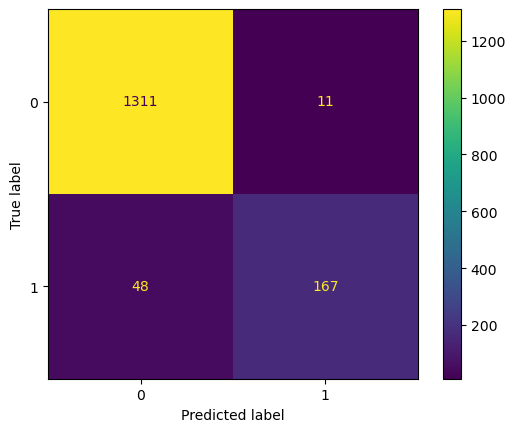

In [118]:
#  Confusion Matrix
cm1 = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=lrc.classes_)
disp.plot()
plt.show()

# MultinomialNB

In [109]:
mnb.fit(X_train, y_train)

# prediction
preds = mnb.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns

print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))  

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       0.98      0.78      0.87       215

    accuracy                           0.97      1537
   macro avg       0.97      0.89      0.93      1537
weighted avg       0.97      0.97      0.97      1537

----------------- Overall Results -----------------
Accuracy Result: 96.75%
Precision Result: 97.40%
Recall Result: 88.96%
F1-Score Result: 92.59%


### Verify Perform 

In [95]:
train_score= mnb.score(X_train,y_train)
test_score = mnb.score(X_test,y_test)

print('train score=', train_score )
print('test score=', test_score)

train score= 0.9728322759069464
test score= 0.9674690956408588


### Confusion matrix visualization

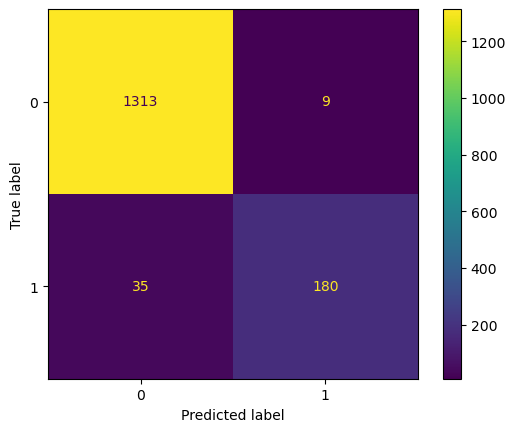

In [115]:
#  Confusion Matrix
cm1 = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=mnb.classes_)
disp.plot()
plt.show()

# Comparing the performance of the models

In [119]:
# Compare Algorithms

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

models = []
models.append(('SVC', svc, X_train, y_train, X_test, y_test))
models.append(('KN', knc, X_train, y_train, X_test, y_test))
models.append(('NB', mnb,X_train, y_train, X_test, y_test ))
models.append(('LR', lrc, X_train, y_train, X_test, y_test))
models.append(('RF', rfc, X_train, y_train, X_test, y_test))
models.append(('AdaBoost', abc, X_train, y_train, X_test, y_test))
models.append(('BgC', bc, X_train, y_train, X_test, y_test))
models.append(('ETC', etc, X_train, y_train, X_test, y_test))
models.append(('GBDT', gbdt, X_train, y_train, X_test, y_test))
models.append(('xgb', xgb, X_train, y_train, X_test, y_test))



# evaluate each model in turn
train_scores = []
test_scores = []
names = []

ypreds = []
f1_scores = []
aucs = []
precisions = []
recalls = []
scoring = 'accuracy'
for name, mod, x_train, y_train, x_test, y_test in models:
    ypred=mod.predict(x_test)
    ypreds.append(ypred)
    precisions.append(precision_score(y_test, ypred))
    recalls.append(recall_score(y_test, ypred))
    f1_scores.append(f1_score(ypred, y_test))
    test_scores.append(mod.score(x_test,y_test))
    train_scores.append(mod.score(x_train,y_train))
    names.append(name)

In [120]:
train_df= pd.DataFrame({'Algorithms':names, 'Train Score':train_scores, 'Test Score':test_scores, 'Recall':recalls,
                        'Precision':precisions,'F1_score':f1_scores})
train_df

Algorithms  Train Score  Test Score    Recall  Precision  F1_score
0        SVC     0.979828    0.971373  0.837209   0.952381  0.891089
1         KN     0.924841    0.912817  0.390698   0.965517  0.556291
2         NB     0.972832    0.967469  0.781395   0.982456  0.870466
3         LR     0.970717    0.961614  0.776744   0.938202  0.849873
4         RF     0.998699    0.974626  0.841860   0.973118  0.902743
5   AdaBoost     0.966162    0.945348  0.772093   0.825871  0.798077
6        BgC     0.998373    0.953155  0.837209   0.829493  0.833333
7        ETC     0.998699    0.977228  0.860465   0.973684  0.913580
8       GBDT     0.951846    0.950553  0.665116   0.972789  0.790055
9        xgb     0.983081    0.965517  0.809302   0.935484  0.867830

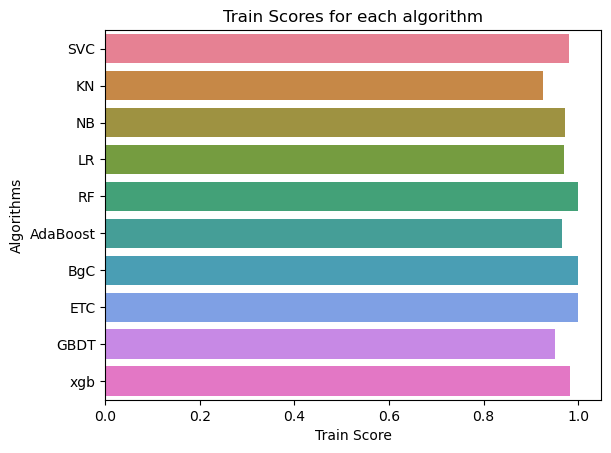

In [121]:
plot = sns.barplot(data = train_df,x="Train Score",y="Algorithms", 
                palette="husl", orient = "h")

plot.set_xlabel("Train Score")
plot = plot.set_title("Train Scores for each algorithm")

## K-fold

In [131]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

# Modeling step Test differents algorithms 
random_state = 0
classifiers = []


classifiers = []
classifiers.append(svc)
classifiers.append(knc)
classifiers.append(mnb)
classifiers.append(lrc)
classifiers.append(rfc)
classifiers.append(abc)
classifiers.append(bc)
classifiers.append(etc)
classifiers.append(gbdt)
classifiers.append(xgb)


### Accuracy

In [132]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","KN","NB","LR","RF","AdaBoost"
                                                                                      ,"BgC","ETC","GBDT","xgb"]})

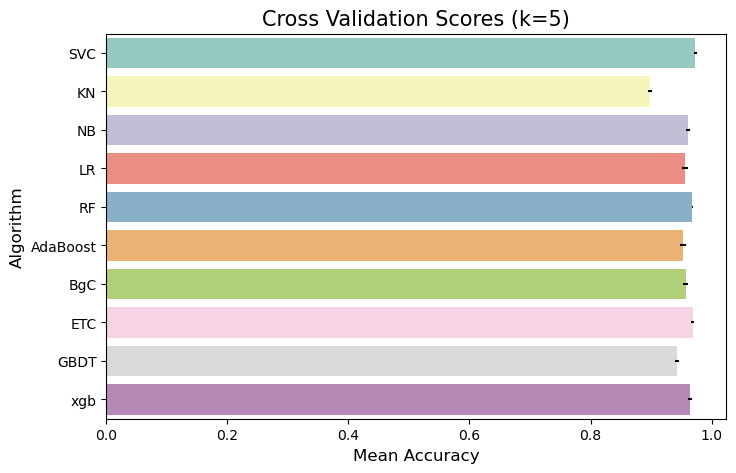

In [133]:
plt.figure(figsize = (8,5))
g = sns.barplot(data = cv_res,x="CrossValMeans",y="Algorithm", palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_ylabel("Algorithm", fontsize = 12)
g.set_xlabel("Mean Accuracy", fontsize = 12)
g = g.set_title("Cross Validation Scores (k=5)", fontsize=15)
plt.show()

# Deployment

In [126]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))